In [29]:
#3

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


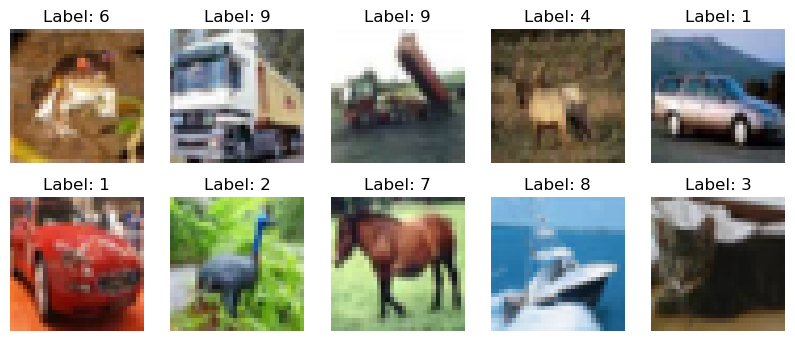

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 50ms/step - accuracy: 0.3866 - loss: 1.6736 - val_accuracy: 0.5267 - val_loss: 1.2955
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5346 - loss: 1.3183 - val_accuracy: 0.5847 - val_loss: 1.1664
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5929 - loss: 1.1661 - val_accuracy: 0.6363 - val_loss: 1.0481
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6331 - loss: 1.0625 - val_accuracy: 0.6423 - val_loss: 1.0022
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6617 - loss: 0.9746 - val_accuracy: 0.6838 - val_loss: 0.9134
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6839 - loss: 0.9102 - val_accuracy: 0.6918 - val_loss: 0.8878
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7067 - loss: 0.8447 - val_accuracy: 0.7037 - val_loss: 0.8672
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7220 - loss: 0.7967 - 

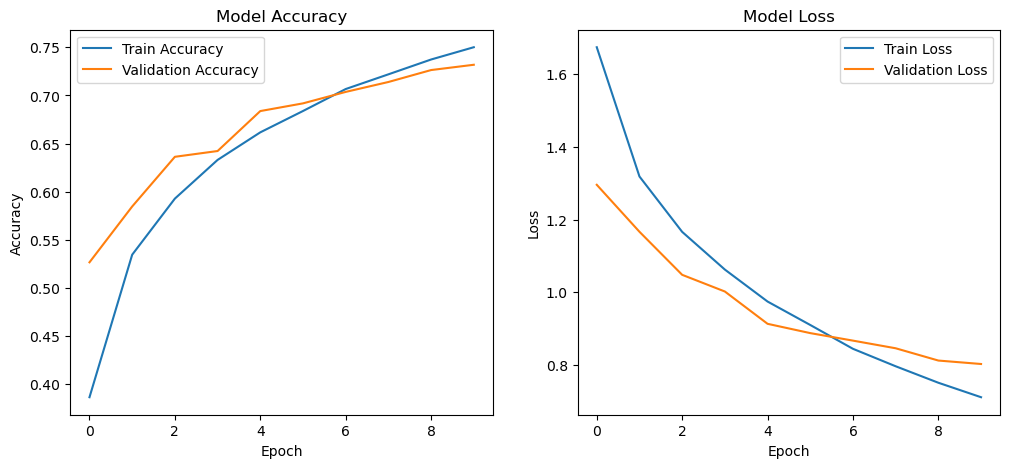

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


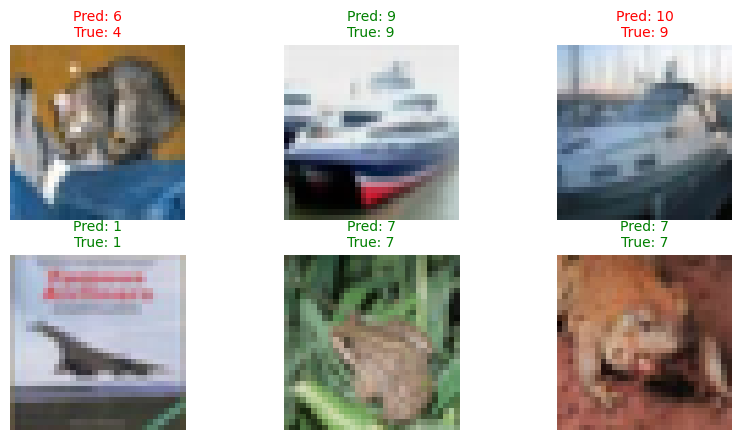

In [3]:
# ===============================================
# a. Loading and Preprocessing the Image Data (Offline)
# ===============================================
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 from local .npz file
data = np.load('cifar-10.npz')

# Extract training and testing data
x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Optional: Display some sample images
# Optional: Display 10 sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
plt.show()

# ===============================================
# b. Defining the Model’s Architecture
# ===============================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ===============================================
# c. Training the Model
# ===============================================
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)

# ===============================================
# d. Estimating the Model’s Performance
# ===============================================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ===============================================
# e. Making Predictions (NEW STAGE)
# ===============================================

# CIFAR-10 class names
class_names = ['1', '2', '3', '4', '5',
               '6', '7', '8', '9', '10']

# Make predictions on test data
predictions = model.predict(x_test)

# Display a few test images with predicted and actual labels
num_images = 6
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[i])
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}",
              color=color, fontsize=10)
    plt.axis('off')
plt.show()


In [30]:
#2

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7761 - loss: 0.8812 - val_accuracy: 0.8880 - val_loss: 0.4131
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8954 - loss: 0.3737 - val_accuracy: 0.9084 - val_loss: 0.3227
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9099 - loss: 0.3129 - val_accuracy: 0.9221 - val_loss: 0.2820
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9205 - loss: 0.2787 - val_accuracy: 0.9274 - val_loss: 0.2586
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9275 - loss: 0.2538 - val_accuracy: 0.9320 - val_loss: 0.2365
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9333 - loss: 0.2339 - val_accuracy: 0.9348 - val_loss: 0.2261
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9384 - loss: 0.2172 - val_accuracy: 0.9405 - val_loss: 0.2072
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9419 - loss: 0.2025 - val_accuracy: 0.

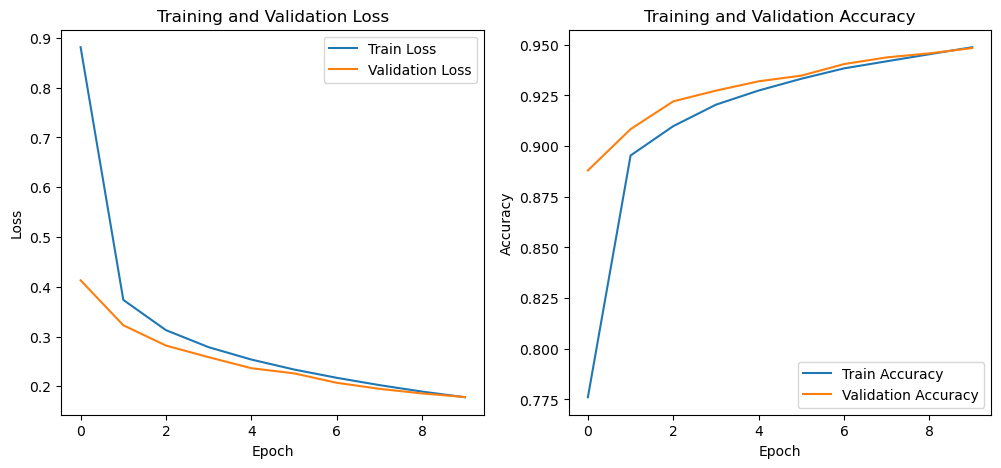

In [1]:
# ===============================================
# a. Import the necessary packages
# ===============================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

# ===============================================
# b. Load the training and testing data (Offline MNIST)
# ===============================================
# Make sure 'mnist.npz' is in the same folder as this script
data = np.load('mnist.npz')

x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# ===============================================
# c. Define the network architecture using Keras
# ===============================================
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

# ===============================================
# d. Train the model using SGD
# ===============================================
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

# ===============================================
# e. Evaluate the network
# ===============================================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# ===============================================
# f. Plot the training loss and accuracy
# ===============================================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


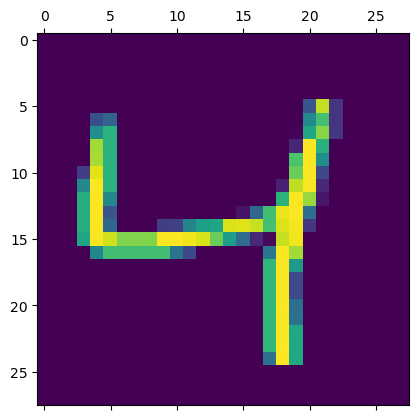

In [2]:
import matplotlib.pyplot as plt
plt.matshow(x_train[2])

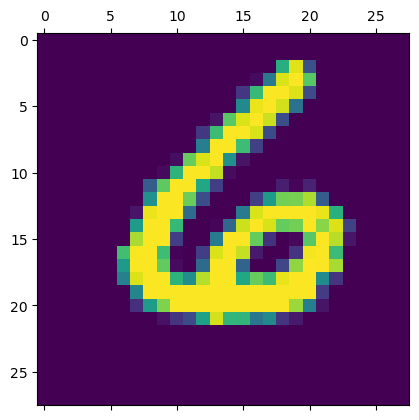

In [23]:
import random 
n = random.randint(0,9999)   # Pick a random number between 0 and 9999
plt.matshow(x_test[n])


In [25]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Handwritten number in the image is= 6


In [ ]:
#5

In [13]:
# ===============================================
# Continuous Bag of Words (CBOW) Model Implementation
# ===============================================

import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Lambda, Dense
from tensorflow.keras.preprocessing import text
from tensorflow.keras.utils import to_categorical, pad_sequences
from sklearn.metrics.pairwise import euclidean_distances
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords', quiet=True)

# ===============================================
# a. Data Preparation
# ===============================================
data = [
    "Natural Language Processing is a field of Artificial Intelligence.",
    "Word embeddings help computers understand human language.",
    "CBOW predicts the target word using surrounding context words.",
    "Word2Vec is widely used in NLP applications.",
    "CBOW is faster and works better with frequent words."
]

stop_words = set(stopwords.words('english'))

# Tokenization and word indexing
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts([[w for w in text.text_to_word_sequence(d) if w not in stop_words] for d in data])

word2id = tokenizer.word_index
word2id['PAD'] = 0
id2word = {v: k for k, v in word2id.items()}

# Convert sentences to sequences of word IDs
wids = [[word2id[w] for w in text.text_to_word_sequence(d) if w not in stop_words] for d in data]

vocab_size = len(word2id)
embed_size = 50
window_size = 2

print("Vocabulary Size:", vocab_size)
print("Sample Vocabulary:", list(word2id.items())[:10])

# ===============================================
# b. Generate Training Data
# ===============================================
def generate_data(corpus):
    for words in corpus:
        for i, w in enumerate(words):
            context = [words[j] for j in range(i - window_size, i + window_size + 1)
                       if 0 <= j < len(words) and j != i]
            x = pad_sequences([context], maxlen=window_size * 2)
            y = to_categorical([w], vocab_size)
            yield x, y

# Display sample context–target pairs
print("\nSample Context–Target Pairs:")
for i, (x, y) in enumerate(generate_data(wids)):
    print("Context:", [id2word[t] for t in x[0]], "→ Target:", id2word[np.argmax(y)])
    if i == 4:
        break

# ===============================================
# c. Build and Train CBOW Model
# ===============================================
cbow = Sequential([
    Embedding(vocab_size, embed_size, input_length=window_size * 2),
    Lambda(lambda x: K.mean(x, axis=1)),
    Dense(vocab_size, activation='softmax')
])

cbow.compile(loss='categorical_crossentropy', optimizer='adam')
print(cbow.summary())
print("\nTraining Model:")

for epoch in range(10):
    loss = np.mean([cbow.train_on_batch(x, y) for x, y in generate_data(wids)])
    print(f"Epoch {epoch + 1}: Loss={loss:.4f}")

# ===============================================
# d. Output — Find Similar Words
# ===============================================
weights = cbow.get_weights()[0][1:]  # Skip 'PAD' token

user = input("\nEnter a word to find similar words: ").strip().lower()
if user in word2id:
    distances = euclidean_distances(weights)
    idx = word2id[user] - 1
    similar_words = [id2word[i + 1] for i in distances[idx].argsort()[1:6]]
    print(f"Top similar words to '{user}': {similar_words}")
else:
    print(f"'{user}' not found in vocabulary.")


Vocabulary Size: 29
Sample Vocabulary: [('language', 1), ('word', 2), ('cbow', 3), ('words', 4), ('natural', 5), ('processing', 6), ('field', 7), ('artificial', 8), ('intelligence', 9), ('embeddings', 10)]

Sample Context–Target Pairs:
Context: ['PAD', 'PAD', 'language', 'processing'] → Target: natural
Context: ['PAD', 'natural', 'processing', 'field'] → Target: language
Context: ['natural', 'language', 'field', 'artificial'] → Target: processing
Context: ['language', 'processing', 'artificial', 'intelligence'] → Target: field
Context: ['PAD', 'processing', 'field', 'intelligence'] → Target: artificial


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_10 (Lambda)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None

Training Model:
Epoch 1: Loss=3.3736
Epoch 2: Loss=3.3661
Epoch 3: Loss=3.3544
Epoch 4: Loss=3.3426
Epoch 5: Loss=3.3304
Epoch 6: Loss=3.3174
Epoch 7: Loss=3.3035
Epoch 8: Loss=3.2886
Epoch 9: Loss=3.2725
Epoch 10: Loss=3.2552



Enter a word to find similar words:  h


'h' not found in vocabulary.


In [1]:
#4

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_space (Dense)                 │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 30)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,362 (5.32 KB)

 Trainable params: 1,362 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1173 - mae: 0.3213 - val_loss: 0.1120 - val_mae: 0.3110
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1153 - mae: 0.3181 - val_loss: 0.1098 - val_mae: 0.3074
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1125 - mae: 0.3134 - val_loss: 0.1063 - val_mae: 0.3015
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1083 - mae: 0.3060 - val_loss: 0.1013 - val_mae: 0.2926
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1025 - mae: 0.2956 - val_loss: 0.0945 - val_mae: 0.2800
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0946 - mae: 0.2802 - val_loss: 0.0855 - val_mae: 0.2615
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0843 - mae: 0.2586 - val_loss: 0.0746 - val_mae: 0.2366
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0724 - mae: 0.2313 - val_loss: 0.0635 - val_mae: 0.2103
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0610 - mae: 

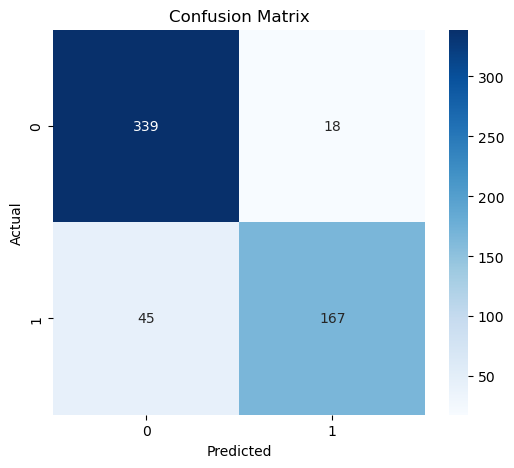


Classification Report:
               precision    recall  f1-score   support

      Benign       0.88      0.95      0.91       357
   Malignant       0.90      0.79      0.84       212

    accuracy                           0.89       569
   macro avg       0.89      0.87      0.88       569
weighted avg       0.89      0.89      0.89       569



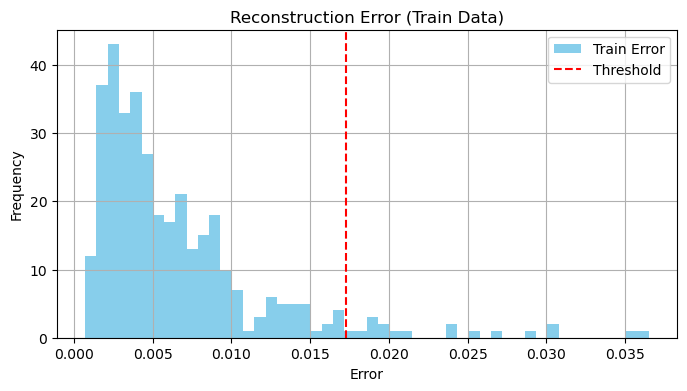

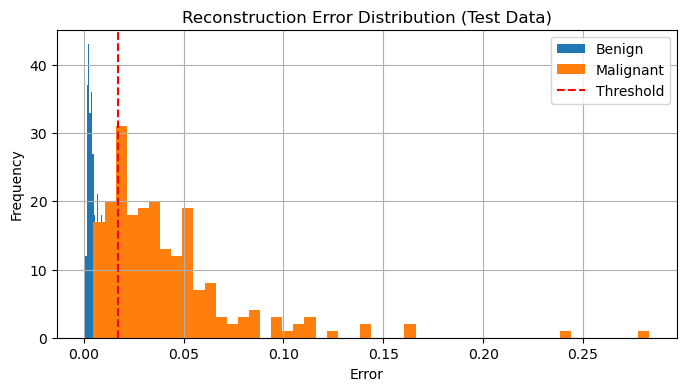

In [14]:
# ===============================================
# a. Import Required Libraries
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# ===============================================
# b. Load and Preprocess the Dataset
# ===============================================
# Column names for wdbc.data
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Load dataset
df = pd.read_csv('wdbc.data', header=None, names=columns)

# Encode diagnosis: M = Malignant (1), B = Benign (0)
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

# Drop ID column
df = df.drop('ID', axis=1)

# Separate features and labels
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Scale features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train on BENIGN data (normal)
X_train = X_scaled[y == 0]   # Normal
X_test = X_scaled             # Mixed data

# ===============================================
# c. Encoder Converts it into Latent Representation
# ===============================================
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(16, activation='relu')(input_layer)
encoder = Dense(8, activation='relu')(encoder)
latent = Dense(4, activation='relu', name='latent_space')(encoder)

# Decoder
decoder = Dense(8, activation='relu')(latent)
decoder = Dense(16, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()
# ===============================================
# e. Compile and Train the Model
# ===============================================
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ===============================================
# d. Decoder Reconstructs the Input (Built above)
# ===============================================

# ===============================================
# Evaluate Anomalies
# ===============================================
# Reconstruct all data
X_pred = autoencoder.predict(X_test)

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(X_test - X_pred), axis=1)

# Determine threshold using training reconstruction errors
X_train_pred = autoencoder.predict(X_train)
train_error = np.mean(np.square(X_train - X_train_pred), axis=1)
threshold = np.percentile(train_error, 95)

# Predict anomalies
y_pred = (reconstruction_error > threshold).astype(int)

# ===============================================
# Model Evaluation
# ===============================================
print("\nThreshold for anomaly detection:", threshold)

cm = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:\n",cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=['Benign', 'Malignant']))

# ===============================================
# Visualization
# ===============================================
plt.figure(figsize=(8, 4))
plt.hist(train_error, bins=50, color='skyblue', label='Train Error')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title("Reconstruction Error (Train Data)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(reconstruction_error[y==0], bins=50, label='Benign')
plt.hist(reconstruction_error[y==1], bins=50, label='Malignant')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title("Reconstruction Error Distribution (Test Data)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


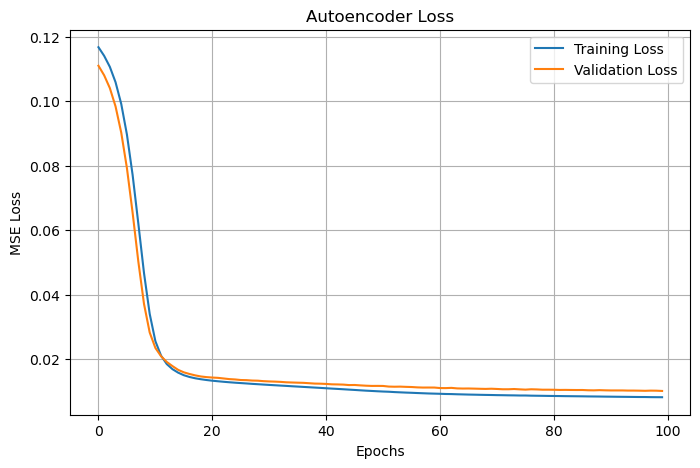

In [7]:
# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

Shape: (4997, 141)
Target column: 1.0
Before SMOTE: [1663 2334]
After SMOTE : [2334 2334]


C:\temp\ipykernel_19404\2965672297.py:41: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  print("Before SMOTE:", np.bincount(y_train))
C:\temp\ipykernel_19404\2965672297.py:42: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  print("After SMOTE :", np.bincount(y_train_bal))


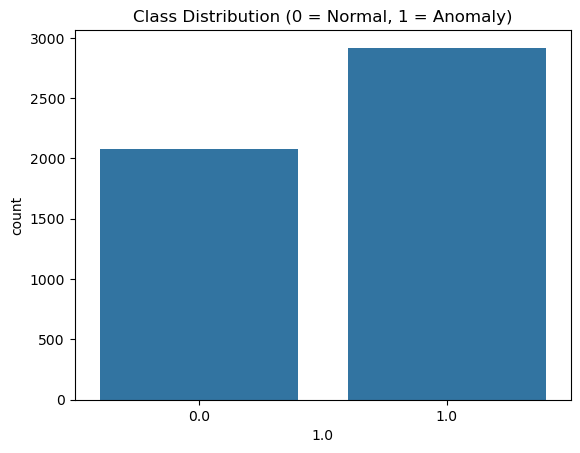

Training dataset shape: (4668, 140), Testing dataset shape: (1000, 140)
Input dimension: 140


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          18,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 140)                 │          18,060 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,812 (214.11 KB)

 Trainable params: 54,812 (214.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0219 - mae: 0.1190 - val_loss: 0.0134 - val_mae: 0.0859
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mae: 0.0744 - val_loss: 0.0099 - val_mae: 0.0707
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mae: 0.0663 - val_loss: 0.0076 - val_mae: 0.0620
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mae: 0.0542 - val_loss: 0.0050 - val_mae: 0.0480
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mae: 0.0443 - val_loss: 0.0041 - val_mae: 0.0424
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mae: 0.0402 - val_loss: 0.0036 - val_mae: 0.0398
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mae: 0.0380 - val_loss: 0.0033 - val_mae: 0.0378
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mae: 0.0366 - val_loss: 0.0031 - val_mae: 0.0365
Epoch 9/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mae:

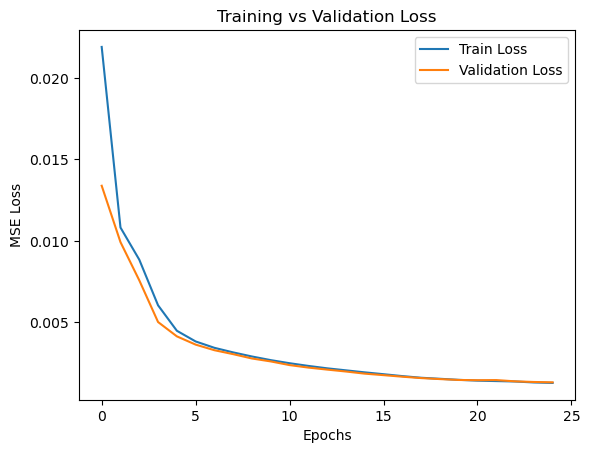

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Reconstruction Threshold: 0.0036

===== MODEL PERFORMANCE =====
Accuracy : 0.42
Precision: 0.51
Recall   : 0.05
F1 Score : 0.08


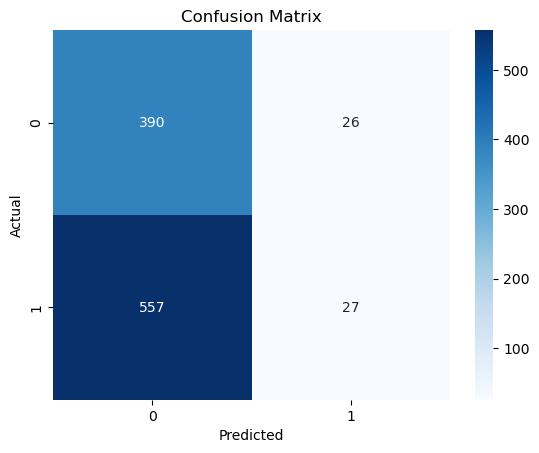


Total Test Samples     : 1000
Normal Samples Detected: 947
Anomalies Detected     : 53

===== RESULT AND CONCLUSION =====
✅ The Autoencoder successfully learned to reconstruct normal ECG signals.
✅ Samples with high reconstruction error were identified as anomalies.
✅ Evaluation metrics such as accuracy, precision, recall, and F1 score
   help assess the model’s ability to detect anomalies effectively.


In [1]:
# ==============================================
# AUTOENCODER-BASED ANOMALY DETECTION
# ==============================================

# a. Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, models

# ==============================================
# b. Upload / Access the Dataset
# ==============================================

# Load dataset
data = pd.read_csv("ecg.csv")

print(f"Shape: {data.shape}")
print(f"Target column: {data.columns[-1]}")

# Split into features and target
X, y = data.iloc[:, :-1], data.iloc[:, -1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_bal))

# Visualize class distribution
sns.countplot(x=y)
plt.title("Class Distribution (0 = Normal, 1 = Anomaly)")
plt.show()

# ==============================================
# Data Scaling
# ==============================================
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled  = scaler.transform(X_test)

print(f"Training dataset shape: {X_train_scaled.shape}, Testing dataset shape: {X_test_scaled.shape}")

# ==============================================
# c. Encoder: Convert to Latent Representation
# d. Decoder: Reconstruct the Original Input
# ==============================================

# Define model input dimension
input_dim = X_train_scaled.shape[1]
print(f"Input dimension: {input_dim}")

# Build Autoencoder model
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),

    # Encoder
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(16, activation="tanh"),  # Latent representation

    # Decoder
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(input_dim, activation="sigmoid")  # Output reconstruction
])

# ==============================================
# e. Compile the Model (Optimizer, Loss, Metrics)
# ==============================================
autoencoder.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

# Display model summary
autoencoder.summary()

# ==============================================
# Train the Autoencoder
# ==============================================
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    validation_data=(X_test_scaled, X_test_scaled),
    epochs=25,
    batch_size=256,
    verbose=1
)


# Plot Training vs Validation Loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# ==============================================
# Model Evaluation
# ==============================================

# Generate reconstructed outputs
X_train_pred = autoencoder.predict(X_train_scaled)
X_test_pred  = autoencoder.predict(X_test_scaled)

# Calculate reconstruction error (MSE per sample)
train_errors = np.mean((X_train_scaled - X_train_pred) ** 2, axis=1)
test_errors  = np.mean((X_test_scaled - X_test_pred) ** 2, axis=1)

# Define anomaly detection threshold
threshold = train_errors.mean() + train_errors.std()
print(f"Reconstruction Threshold: {threshold:.4f}")

# Predict anomalies
y_pred = (test_errors > threshold).astype(int)

# ==============================================
# Performance Metrics
# ==============================================
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n===== MODEL PERFORMANCE =====")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Get indices of anomalies in the test set
anomaly_indices = np.where(y_pred == 1)[0]
normal_indices  = np.where(y_pred == 0)[0]

print(f"\nTotal Test Samples     : {len(y_test)}")
print(f"Normal Samples Detected: {len(normal_indices)}")
print(f"Anomalies Detected     : {len(anomaly_indices)}")

# ==============================================
# Result and Conclusion
# ==============================================
print("\n===== RESULT AND CONCLUSION =====")
print("✅ The Autoencoder successfully learned to reconstruct normal ECG signals.")
print("✅ Samples with high reconstruction error were identified as anomalies.")
print("✅ Evaluation metrics such as accuracy, precision, recall, and F1 score")
print("   help assess the model’s ability to detect anomalies effectively.")
